# Project : Ads Click Prediction
        We will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a         particular user will click on an advertisement. The project was about predicting the ad click rate of a customer, based         on certain features.

The whole project was divided into 6 steps :
*Importing dependencies and loading Data set
*Exploratory Analysis
*Data Cleaning
*Train Test Split
*Training the Model
*Testing the model accuracy

Importing dependencies and Loading Data Set

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#importing the dataset
dataset = pd.read_csv(r'C:\Users\ARPITA KUMARI\.spyder-py3\Ad_click_prediction_train.csv')

In [3]:
print(dataset.shape)

(463291, 15)


In [4]:
dataset.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [5]:
#replace all Nan with 0
dataset = dataset.fillna(0)

 Exploratory Analysis

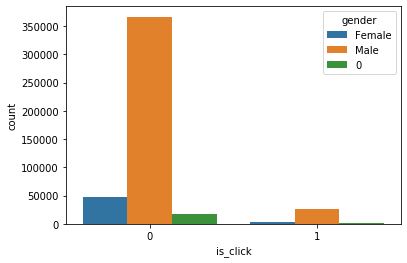

In [6]:
#relation between gender and is_click
sns.countplot(dataset['is_click'],hue=dataset['gender'])

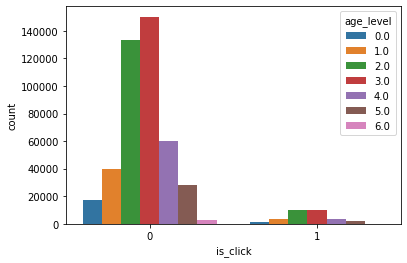

In [7]:
#relation between age level and is_click
sns.countplot(dataset['is_click'],hue=dataset['age_level'])

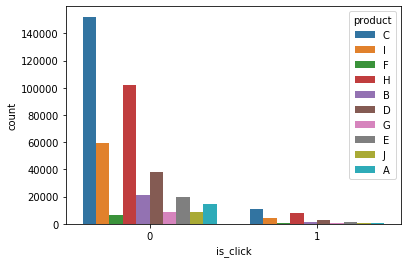

In [8]:
#relation between age level and is_click
sns.countplot(dataset['is_click'],hue=dataset['product'])

In [9]:
object_variables = ['gender','product']
dataset[object_variables].describe(include=['O'])

,gender,product
count,463291,463291
unique,3,10
top,Male,C
freq,393454,163501


In [10]:
gender = pd.get_dummies(dataset['gender'],drop_first=True)
product_type = pd.get_dummies(dataset['product'])
dataset.drop(['gender'],axis = 1,inplace=True)
dataset.drop(['product'],axis = 1,inplace = True)

 Data Cleaning

To convert Date & Time to proper format here we will use dataframe.apply(lambda )

In [11]:
dataset['Date'] = dataset['DateTime'].apply(lambda x : x.split(' ')[0])

In [12]:
dataset['Time'] = dataset['DateTime'].apply(lambda x : x.split(' ')[1])

In [13]:
dataset.drop(['DateTime'], inplace = True, axis = 1)

In [14]:
dataset['Year'] = dataset['Date'].apply(lambda x : x.split('-')[0])

In [15]:
dataset['Month'] = dataset['Date'].apply(lambda x : x.split('-')[1])

In [16]:
dataset['Day'] = dataset['Date'].apply(lambda x : x.split('-')[2])

In [17]:
dataset.drop(['Date'], inplace = True, axis = 1)

In [18]:
dataset['Hours'] = dataset['Time'].apply(lambda x : x.split(':')[0])

In [19]:
dataset['Minutes'] = dataset['Time'].apply(lambda x : x.split(':')[1])

In [20]:
dataset.drop(['Time'], inplace = True, axis = 1)

 Train Test Split

In [21]:
#splitting the dataset
X = dataset.drop(['is_click'], axis = 1)
y = dataset['is_click']

In [22]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [25]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[86400,     0],
       [ 6259,     0]], dtype=int64)

In [26]:
#accuracy
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
cr

C:\Users\ARPITA KUMARI\anaconda3\envs\dlearn\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97     86400\n           1       0.00      0.00      0.00      6259\n\n    accuracy                           0.93     92659\n   macro avg       0.47      0.50      0.48     92659\nweighted avg       0.87      0.93      0.90     92659\n'

So, we are getting a accuracy of 93% by training the model with logistic regression.

Now lets apply our logistic regression model to our test case.

In [29]:
#importing the dataset
dataframe = pd.read_csv(r'C:\Users\ARPITA KUMARI\.spyder-py3\Ad_Click_prediciton_test.csv')

In [30]:
#replace all Nan with 0
dataframe = dataframe.fillna(0)
object_variables = ['gender','product']
dataframe[object_variables].describe(include=['O'])

,gender,product
count,128858,128858
unique,3,10
top,Male,H
freq,108525,44880


In [31]:
gender = pd.get_dummies(dataframe['gender'],drop_first=True)
product_type = pd.get_dummies(dataframe['product'])
dataframe.drop(['gender'],axis = 1,inplace=True)
dataframe.drop(['product'],axis = 1,inplace = True)

In [32]:
dataframe['Date'] = dataframe['DateTime'].apply(lambda x : x.split(' ')[0])
dataframe['Time'] = dataframe['DateTime'].apply(lambda x : x.split(' ')[1])
dataframe.drop(['DateTime'], inplace = True, axis = 1)
dataframe['Year'] = dataframe['Date'].apply(lambda x : x.split('-')[0])
dataframe['Month'] = dataframe['Date'].apply(lambda x : x.split('-')[1])
dataframe['Day'] = dataframe['Date'].apply(lambda x : x.split('-')[2])
dataframe.drop(['Date'], inplace = True, axis = 1)
dataframe['Hours'] = dataframe['Time'].apply(lambda x : x.split(':')[0])
dataframe['Minutes'] = dataframe['Time'].apply(lambda x : x.split(':')[1])
dataframe.drop(['Time'], inplace = True, axis = 1)

In [33]:
dataframe.head()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,Year,Month,Day,Hours,Minutes
0,411705,732573,404347,53587,1,0.0,5.0,5.0,3.0,0.0,0,2017,07,08,00,00
1,208263,172910,118601,28529,3,82527.0,0.0,0.0,0.0,0.0,1,2017,07,08,00,00
2,239450,172910,118601,28529,4,82527.0,0.0,0.0,0.0,0.0,1,2017,07,08,00,00
3,547761,557318,118601,28529,5,82527.0,1.0,1.0,3.0,1.0,0,2017,07,08,00,00
4,574275,923896,118601,28529,5,82527.0,9.0,3.0,1.0,0.0,1,2017,07,08,00,00


In [34]:
Y = dataset['is_click']
x = dataset.drop(['is_click'],axis=1)

In [35]:
classifier.fit(x, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
x_test = dataframe

In [37]:
Y_pred = classifier.predict(x_test)

In [38]:
prediction = pd.DataFrame({'session_id' : dataframe['session_id'],'is_click' : Y_pred},)

In [39]:
prediction

,session_id,is_click
0,411705,0
1,208263,0
2,239450,0
3,547761,0
4,574275,0
...,...,...
128853,215328,0
128854,282232,0
128855,140499,0
128856,531038,0


The model is now applied to the test case. 
And our model is ready.